In [15]:
import sys
!{sys.executable} -m pip install pyarrow

Python(69312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Bloco 1: Importar bibliotecas e carregar os dados preparados para modelagem

In [16]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo Parquet com as features RFM
caminho_rfm = '../data/curated/rfm_features.parquet' 
df_rfm = pd.read_parquet(caminho_rfm)

print("DataFrame RFM carregado com sucesso e pronto para a modelagem!")
display(df_rfm.head())

DataFrame RFM carregado com sucesso e pronto para a modelagem!


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,259,1,193.61
0004d0000beb6c47a5ae74d13af1d0c7e862101147492532fc32d80211558660,1502,1,81.82
00066779acf4b4cae18112860bbb556f0a0b609f5cbdfcefd5ebb574f7e7d600,1370,1,68.44
0007d4c7a554f2aa722aa7840d953395da4c019c36c51dda73c7678d635683c9,1919,1,467.28
000b40069834aaf5757373f9aac1e92968ccbcfff3838ccac21ab4a8eceb0df8,842,2,52.70


Bloco 2: Normalizar os dados para que todas as features tenham a mesma escala


In [17]:
# Inicializando o normalizador
scaler = StandardScaler()

# Aplicando a normalização nos dados do df_rfm
df_rfm_scaled_array = scaler.fit_transform(df_rfm)

# Convertendo o array de volta para um DataFrame do Pandas para facilitar a visualização
df_rfm_scaled = pd.DataFrame(df_rfm_scaled_array, index=df_rfm.index, columns=df_rfm.columns)

print("Amostra dos dados após a normalização:")
display(df_rfm_scaled.head())

Amostra dos dados após a normalização:


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,-0.949523,-0.217385,-0.097723
0004d0000beb6c47a5ae74d13af1d0c7e862101147492532fc32d80211558660,0.442079,-0.217385,-0.204262
00066779acf4b4cae18112860bbb556f0a0b609f5cbdfcefd5ebb574f7e7d600,0.294298,-0.217385,-0.217014
0007d4c7a554f2aa722aa7840d953395da4c019c36c51dda73c7678d635683c9,0.908932,-0.217385,0.163093
000b40069834aaf5757373f9aac1e92968ccbcfff3838ccac21ab4a8eceb0df8,-0.296825,0.011459,-0.232015


Bloco 3: Encontrar o número ideal de clusters com o Método do Cotovelo

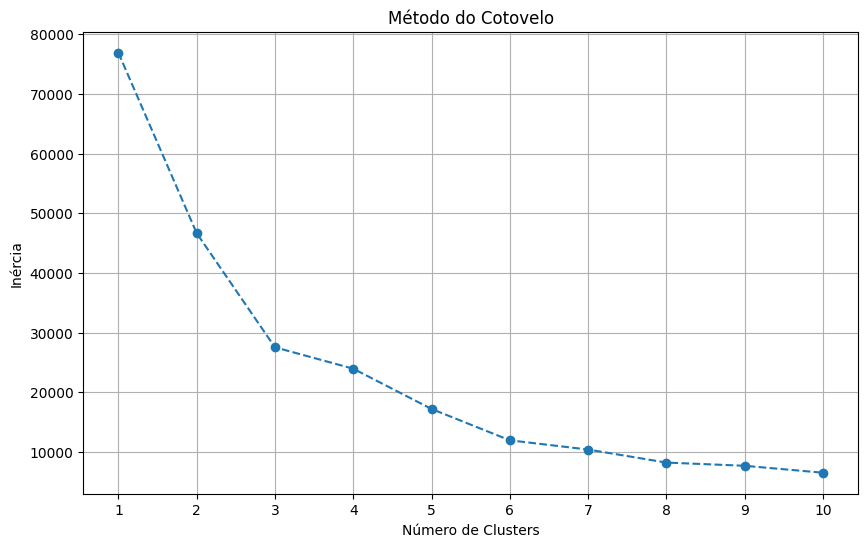

In [18]:
# Lista para guardar os valores de inércia (uma medida de quão compactos são os clusters)
inertia = []
range_n_clusters = range(1, 11) # Vamos testar de 1 a 10 clusters

for n_clusters in range_n_clusters:
    # Cria e treina o modelo K-Means para o número atual de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(df_rfm_scaled)
    
    # Guarda a inércia do modelo treinado
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


Bloco 4: Aplicar o K-Means com o número ideal de clusters


In [19]:
# Definindo o número de clusters com base na sua análise do gráfico
numero_ideal_clusters = 4

# Criando e treinando o modelo K-Means definitivo
kmeans = KMeans(n_clusters=numero_ideal_clusters, random_state=42, n_init='auto')
kmeans.fit(df_rfm_scaled) # Usamos os dados normalizados para treinar

# Adicionando uma nova coluna com o rótulo do cluster ao DataFrame RFM ORIGINAL
df_rfm['Cluster'] = kmeans.labels_

print("DataFrame RFM com os clientes devidamente clusterizados:")
display(df_rfm.head())

DataFrame RFM com os clientes devidamente clusterizados:


,Recencia,Frequencia,ValorMonetario,Cluster
fk_contact,,,,
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,259,1,193.61,3
0004d0000beb6c47a5ae74d13af1d0c7e862101147492532fc32d80211558660,1502,1,81.82,0
00066779acf4b4cae18112860bbb556f0a0b609f5cbdfcefd5ebb574f7e7d600,1370,1,68.44,0
0007d4c7a554f2aa722aa7840d953395da4c019c36c51dda73c7678d635683c9,1919,1,467.28,0
000b40069834aaf5757373f9aac1e92968ccbcfff3838ccac21ab4a8eceb0df8,842,2,52.70,3


# Bloco 5: Análise e Interpretação dos Clusters

In [20]:

# Agrupamos por 'Cluster' e calculamos as médias de RFM e a contagem de clientes
cluster_analysis = df_rfm.groupby('Cluster').agg(
    Recencia_Media=('Recencia', 'mean'),
    Frequencia_Media=('Frequencia', 'mean'),
    ValorMonetario_Medio=('ValorMonetario', 'mean'),
    Contagem_Clientes=('Recencia', 'count')
).round(2)

print("Análise dos Clusters:")
display(cluster_analysis)

Análise dos Clusters:


,Recencia_Media,Frequencia_Media,ValorMonetario_Medio,Contagem_Clientes
Cluster,,,,
0,1475.54,1.45,204.09,7695
1,143.17,202.33,57145.96,6
2,2690.26,1.32,192.71,4137
3,427.72,2.33,353.75,13804


Bloco Final: Mapear os clusters para os nomes das personas e salvar o arquivo final


In [21]:
import json

print("Carregando o mapeamento de aliases de clientes...")
with open('../data/processed/mapa_clientes_alias.json', 'r') as f:
    mapa_clientes = json.load(f)

# Criando o dicionário de mapeamento com os nomes das personas
mapeamento_clusters = {
    2: "Campeões",   
    0: "Fiéis",
    1: "Em Risco",  
    3: "Perdidos"       
}

# Criando a coluna 'segmento' com os nomes das personas
df_rfm['segmento'] = df_rfm['Cluster'].map(mapeamento_clusters)

# Preparando o DataFrame para salvar
df_final_customers = df_rfm.reset_index().rename(columns={'fk_contact': 'id_cliente'})

# Usando o mapa de aliases para criar a coluna de nome do cliente
df_final_customers['nome_cliente'] = df_final_customers['id_cliente'].map(mapa_clientes)

# Adicionando colunas de placeholder que serão preenchidas nos próximos notebooks
df_final_customers['prob_compra_7d'] = 0.0
df_final_customers['prob_compra_30d'] = 0.0
df_final_customers['sugestao_prox_produto'] = "Aguardando recomendação"
df_final_customers['data_prox_viagem'] = "Aguardando previsão"

# Selecionando e ordenando as colunas
colunas_finais = [
    'id_cliente', 
    'nome_cliente', 
    'segmento',
    'prob_compra_7d',
    'prob_compra_30d', 
    'sugestao_prox_produto', 
    'data_prox_viagem'
]
df_final_customers = df_final_customers[colunas_finais]

# Salvando o arquivo final
caminho_customers = '../data/redis/customers.parquet'
df_final_customers.to_parquet(caminho_customers, index=False)

print(f"Arquivo final 'customers.parquet' criado com sucesso!")
display(df_final_customers.head())

Carregando o mapeamento de aliases de clientes...
Arquivo final 'customers.parquet' criado com sucesso!


,id_cliente,nome_cliente,segmento,prob_compra_7d,prob_compra_30d,sugestao_prox_produto,data_prox_viagem
0,0001018716456b2b34ca7a31f9b597974be6e1c9f6122a...,Juliana Costa,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
1,0004d0000beb6c47a5ae74d13af1d0c7e8621011474925...,Henry Araújo,Fiéis,0.0,0.0,Aguardando recomendação,Aguardando previsão
2,00066779acf4b4cae18112860bbb556f0a0b609f5cbdfc...,Bruna Dias,Fiéis,0.0,0.0,Aguardando recomendação,Aguardando previsão
3,0007d4c7a554f2aa722aa7840d953395da4c019c36c51d...,Sr. Bernardo Fogaça,Fiéis,0.0,0.0,Aguardando recomendação,Aguardando previsão
4,000b40069834aaf5757373f9aac1e92968ccbcfff3838c...,Matheus Oliveira,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
